In [1]:
## Main Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import joblib
import warnings
import missingno
warnings.filterwarnings('ignore')
## sklearn -- preprocessing
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn_features.transformers import DataFrameSelector
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import FunctionTransformer

#import GridSearchCV
from sklearn.model_selection import GridSearchCV

## sklearn -- models
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier


## skelarn -- metrics
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

## Importing the Data

In [2]:
df=pd.read_csv('Data.csv')

In [3]:
df.head(4)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y


## Getting to know the data

In [4]:
df.shape

(614, 13)

In [5]:
df.info() ## Checking Datatypes 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [6]:
df['Dependents'].value_counts()

Dependents
0     345
1     102
2     101
3+     51
Name: count, dtype: int64

## Checking for null values

<Axes: >

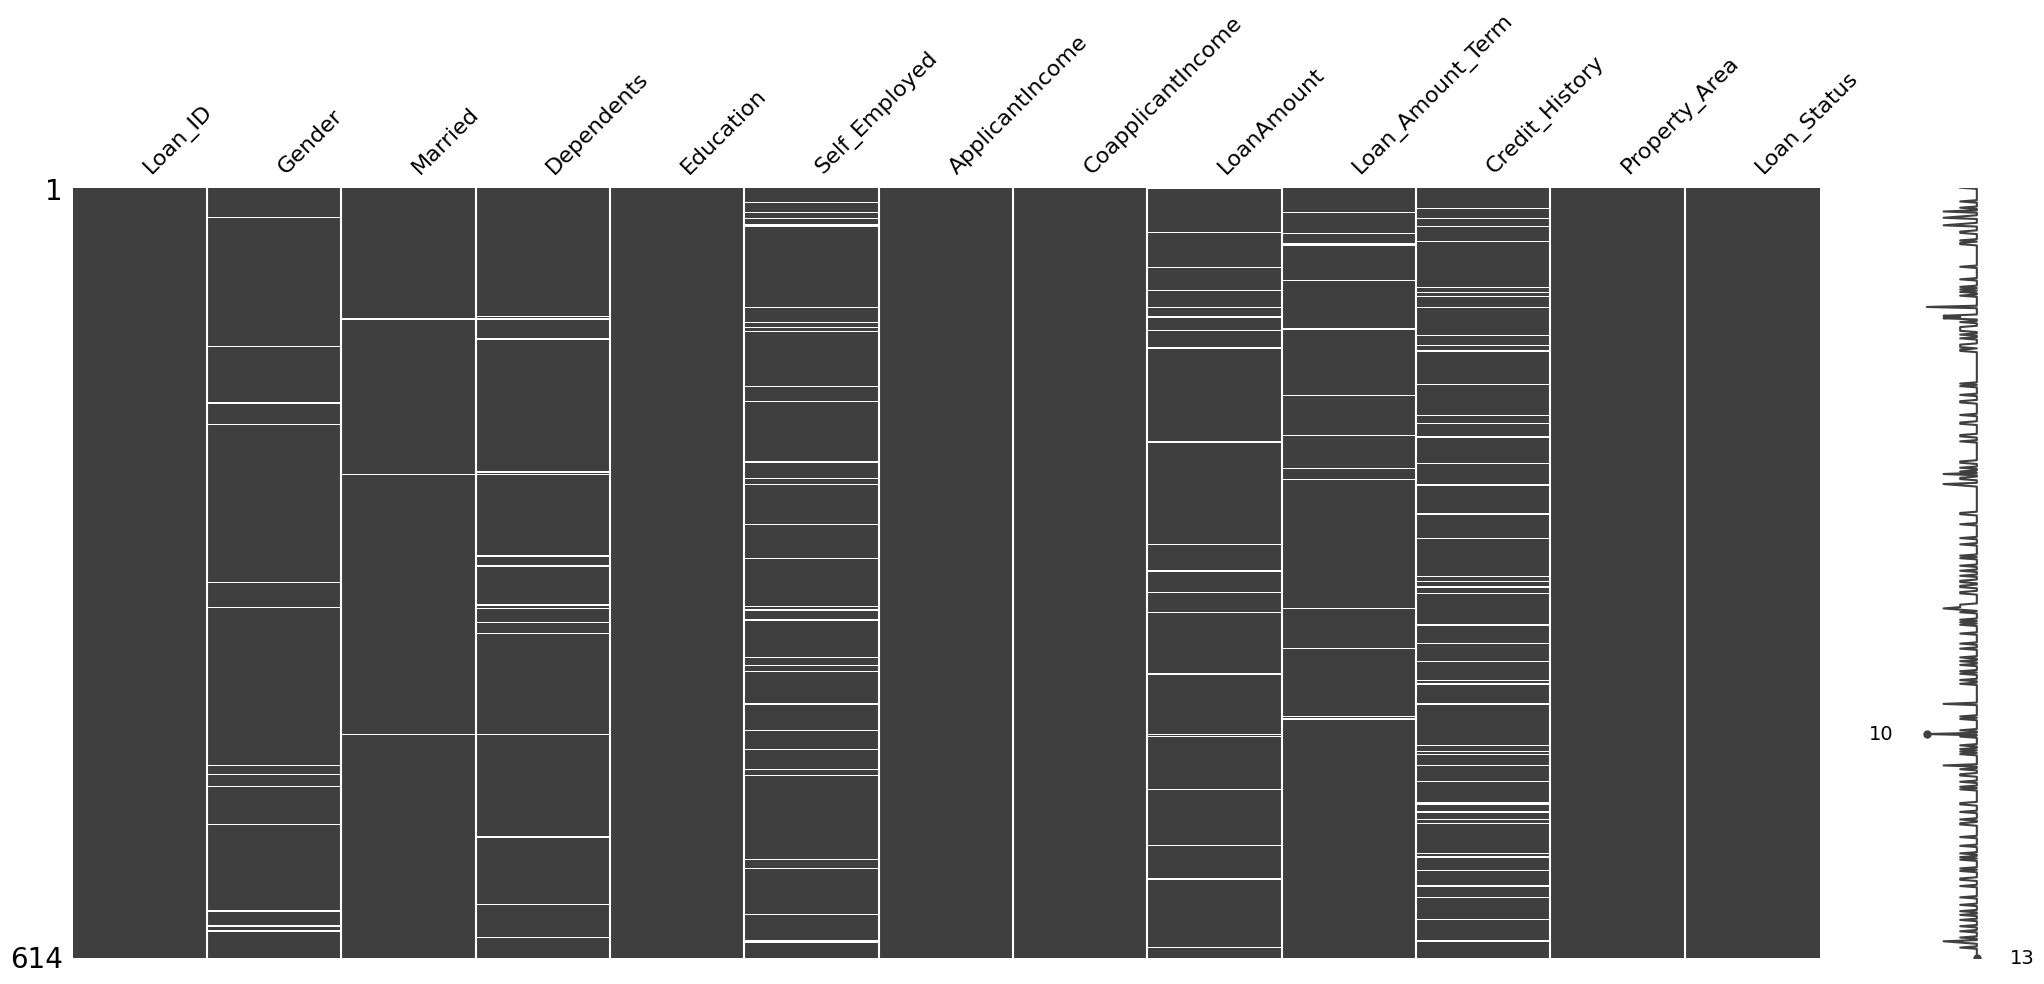

In [7]:
missingno.matrix(df)

In [8]:
df.dropna(inplace=True)

In [9]:
df.isna().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

## The Data Seems to be clean and dont need any adjustments right now

## Data Visualization 

## Distrubtion of ApplicantIncome with kernel denisty

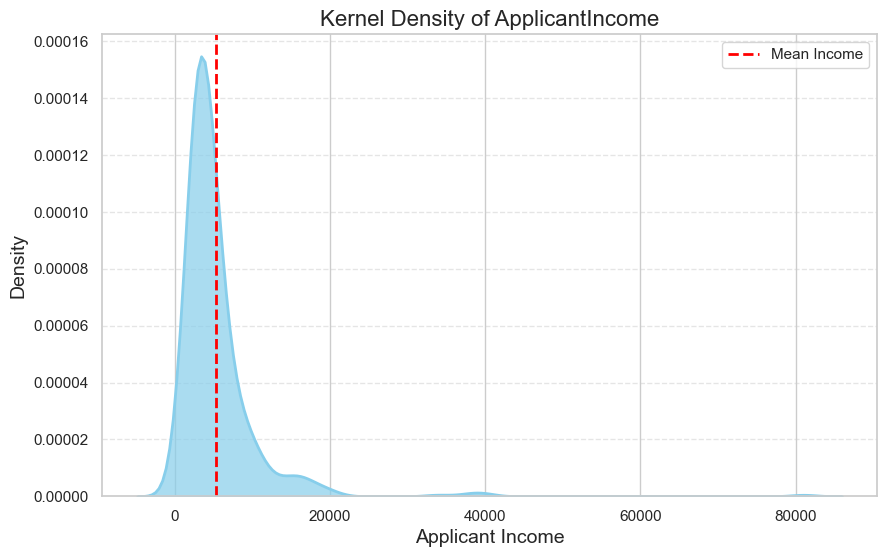

In [10]:

sns.set_theme(style="whitegrid")
plt.figure(figsize=(10, 6))
sns.kdeplot(df['ApplicantIncome'], fill=True, color='skyblue', linewidth=2, alpha=0.7)
plt.axvline(df['ApplicantIncome'].mean(), color='red', linestyle='dashed', linewidth=2, label='Mean Income')
plt.title('Kernel Density of ApplicantIncome', fontsize=16)
plt.xlabel('Applicant Income', fontsize=14)
plt.ylabel('Density', fontsize=14)
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.fill_between(df['ApplicantIncome'], 0, alpha=0.1, color='skyblue')
plt.show()

## One For Co Applicant Income

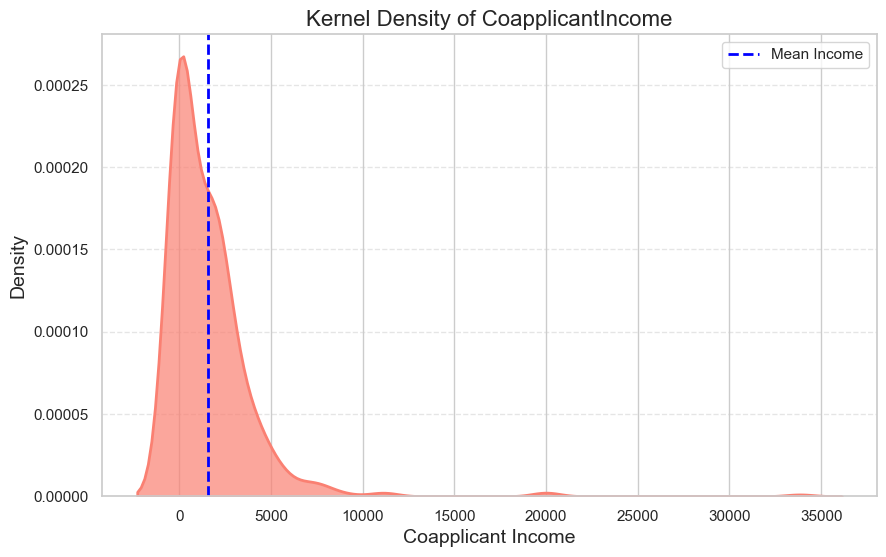

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set a stylish seaborn theme
sns.set_theme(style="whitegrid")

# Assuming your DataFrame is named 'df'
plt.figure(figsize=(10, 6))

# Plotting the kernel density of CoapplicantIncome with a filled curve
sns.kdeplot(df['CoapplicantIncome'], fill=True, color='salmon', linewidth=2, alpha=0.7)

# Adding a vertical line for the mean
plt.axvline(df['CoapplicantIncome'].mean(), color='blue', linestyle='dashed', linewidth=2, label='Mean Income')

# Adding title and labels
plt.title('Kernel Density of CoapplicantIncome', fontsize=16)
plt.xlabel('Coapplicant Income', fontsize=14)
plt.ylabel('Density', fontsize=14)

# Adding a legend
plt.legend()

# Adding a background grid for better readability
plt.grid(axis='y', linestyle='--', alpha=0.5)

# Adding a shadow to the filled area
plt.fill_between(df['CoapplicantIncome'], 0, alpha=0.1, color='salmon')

# Displaying the plot
plt.show()


## Loan Amount Distrubtion

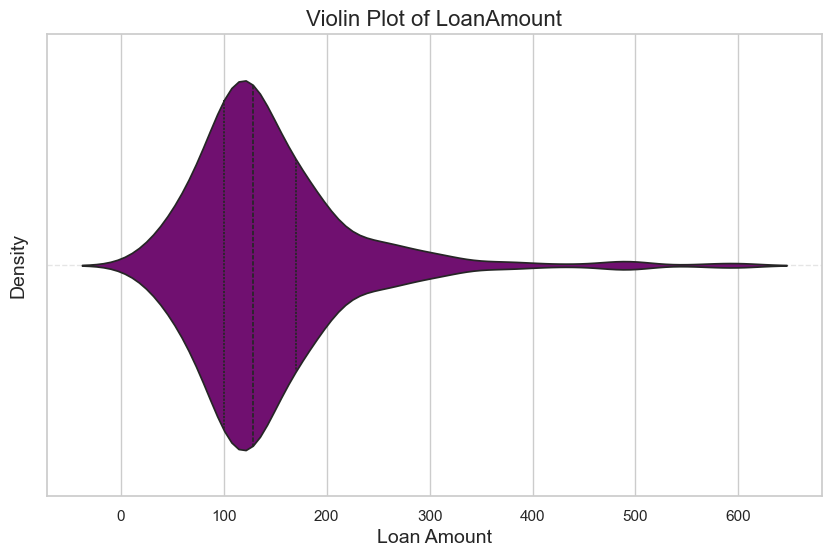

In [12]:


# Set a stylish seaborn theme
sns.set_theme(style="whitegrid")

# Assuming your DataFrame is named 'df'
plt.figure(figsize=(10, 6))

# Create a violin plot for LoanAmount
sns.violinplot(x='LoanAmount', data=df, color='purple', inner='quartile')

# Adding title and labels
plt.title('Violin Plot of LoanAmount', fontsize=16)
plt.xlabel('Loan Amount', fontsize=14)
plt.ylabel('Density', fontsize=14)

# Adding a background grid for better readability
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.show()


## Loan Amount Term Distrubtion

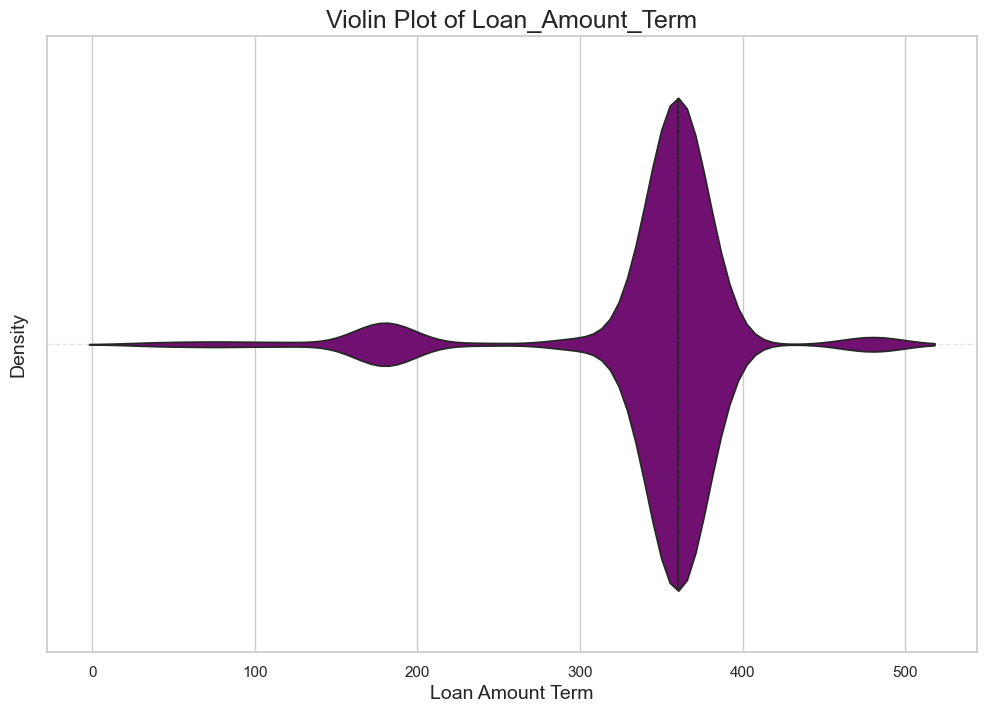

In [13]:
sns.set_theme(style="whitegrid")
plt.figure(figsize=(12, 8))
sns.violinplot(x='Loan_Amount_Term', data=df, color="purple", inner='quartile')
plt.title('Violin Plot of Loan_Amount_Term', fontsize=18)
plt.xlabel('Loan Amount Term', fontsize=14)
plt.ylabel('Density', fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.show()


## Distrubtion of Gender

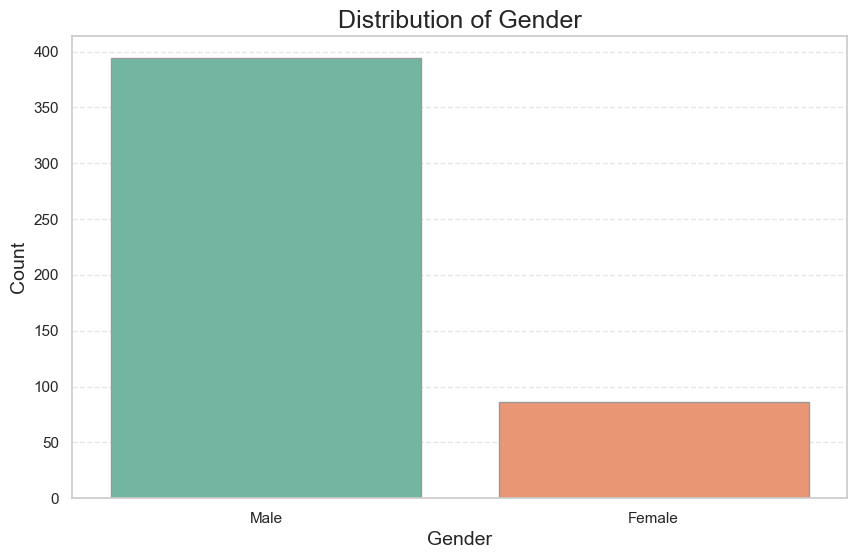

In [14]:
sns.set_theme(style="whitegrid")
plt.figure(figsize=(10, 6))
sns.countplot(x='Gender', data=df, palette="Set2", edgecolor=".6")
plt.title('Distribution of Gender', fontsize=18)
plt.xlabel('Gender', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.show()

## Distrubtion of Married Column

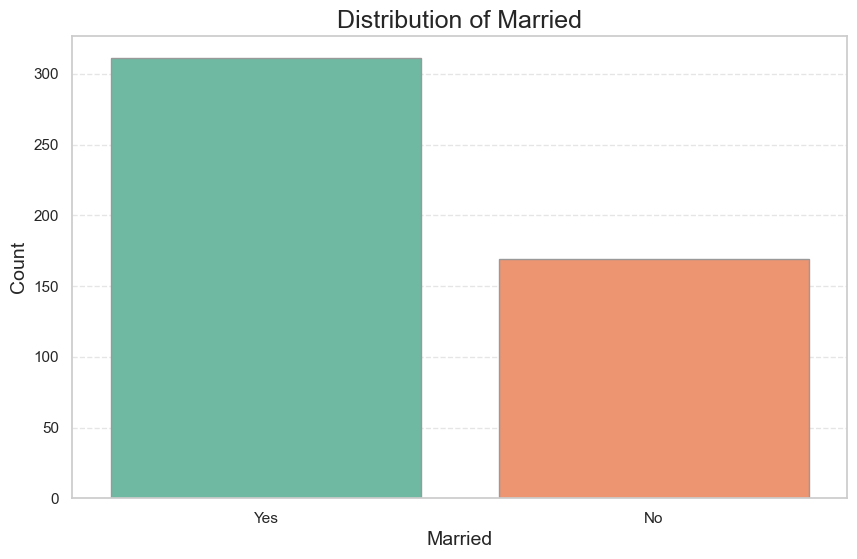

In [15]:
sns.set_theme(style="whitegrid")
plt.figure(figsize=(10, 6))
sns.countplot(x='Married', data=df, palette="Set2", edgecolor=".6", saturation=0.8)
plt.title('Distribution of Married', fontsize=18)
plt.xlabel('Married', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.show()

## Education Distrubtion

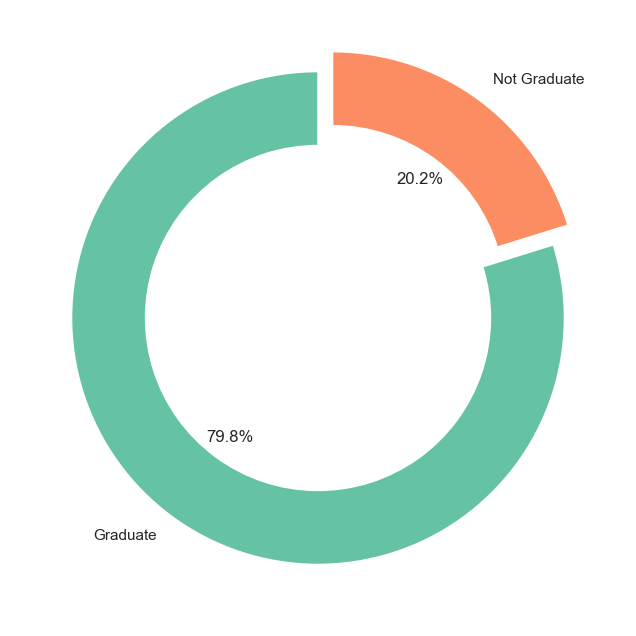

In [16]:
sns.set_theme(style="whitegrid")
plt.figure(figsize=(10, 8))
education_counts = df['Education'].value_counts()
explode = (0, 0.1) 
colors = sns.color_palette("Set2")
plt.pie(education_counts, labels=education_counts.index, autopct='%1.1f%%', colors=colors, startangle=90, explode=explode, wedgeprops=dict(width=0.3, edgecolor='w'))
plt.show()

## Dependents Distrubtion

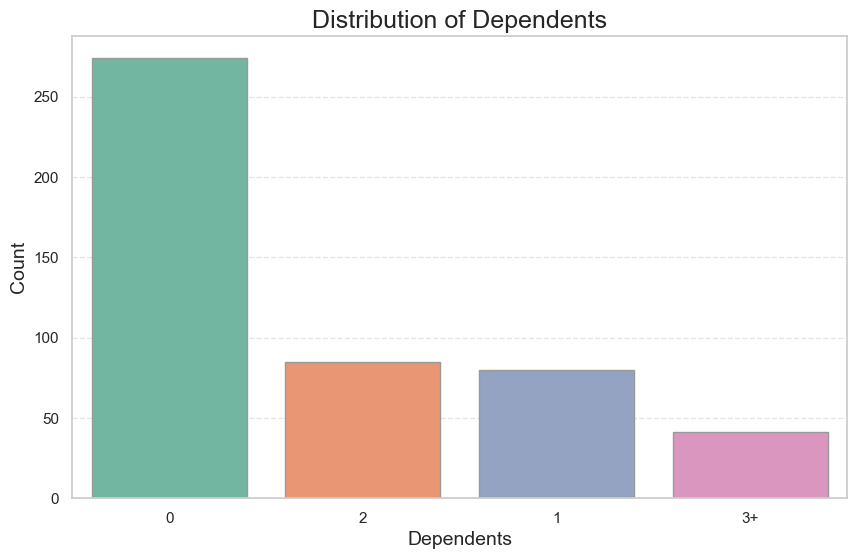

In [17]:
sns.set_theme(style="whitegrid")
plt.figure(figsize=(10, 6))
sns.countplot(x='Dependents', data=df, palette="Set2", edgecolor=".6", order=df['Dependents'].value_counts().index)
plt.title('Distribution of Dependents', fontsize=18)
plt.xlabel('Dependents', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.show()


## Subplot for Self Employed , Credit History , Property Area

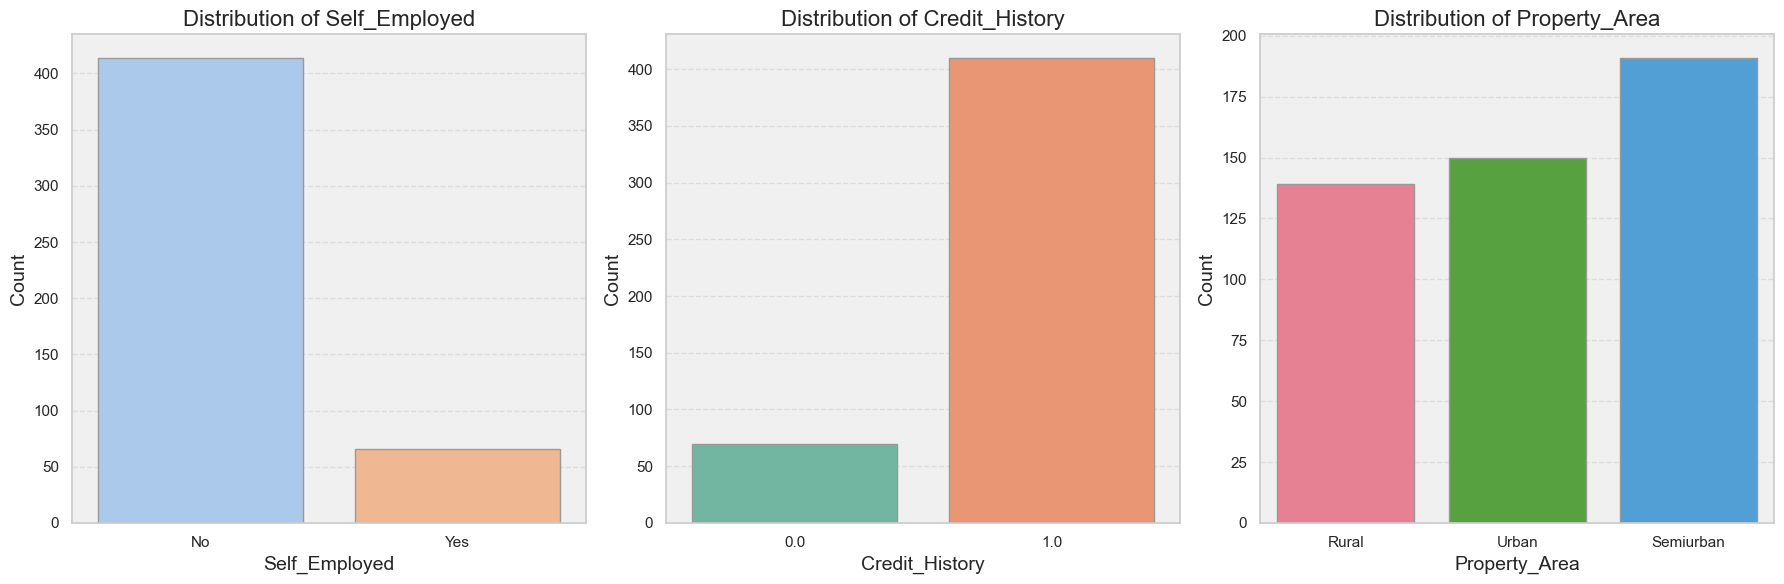

In [18]:
sns.set_theme(style="whitegrid")
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(18, 6))
sns.countplot(x='Self_Employed', data=df, palette="pastel", edgecolor=".6", ax=axes[0])
sns.countplot(x='Credit_History', data=df, palette="Set2", edgecolor=".6", ax=axes[1])
sns.countplot(x='Property_Area', data=df, palette="husl", edgecolor=".6", ax=axes[2])
axes[0].set_title('Distribution of Self_Employed', fontsize=16)
axes[0].set_xlabel('Self_Employed', fontsize=14)
axes[0].set_ylabel('Count', fontsize=14)

axes[1].set_title('Distribution of Credit_History', fontsize=16)
axes[1].set_xlabel('Credit_History', fontsize=14)
axes[1].set_ylabel('Count', fontsize=14)

axes[2].set_title('Distribution of Property_Area', fontsize=16)
axes[2].set_xlabel('Property_Area', fontsize=14)
axes[2].set_ylabel('Count', fontsize=14)
for ax in axes:
    ax.set_facecolor("#f0f0f0")
    ax.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


## Target Distrubtion 'UnBalanced Target'

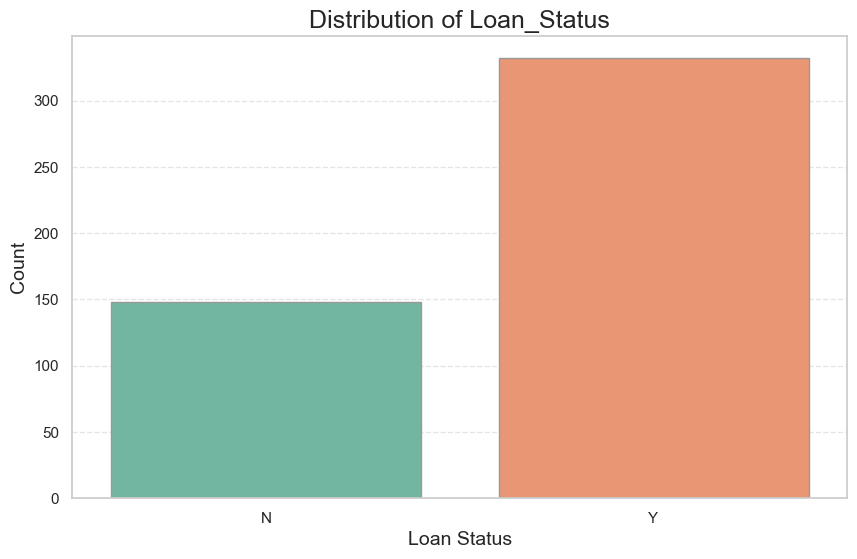

In [19]:
sns.set_theme(style="whitegrid")
plt.figure(figsize=(10, 6))
sns.countplot(x='Loan_Status', data=df, palette="Set2", edgecolor=".6")
plt.title('Distribution of Loan_Status', fontsize=18)
plt.xlabel('Loan Status', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.show()

## Bivariate Analysis

## Approval Rate Based On Martial Status

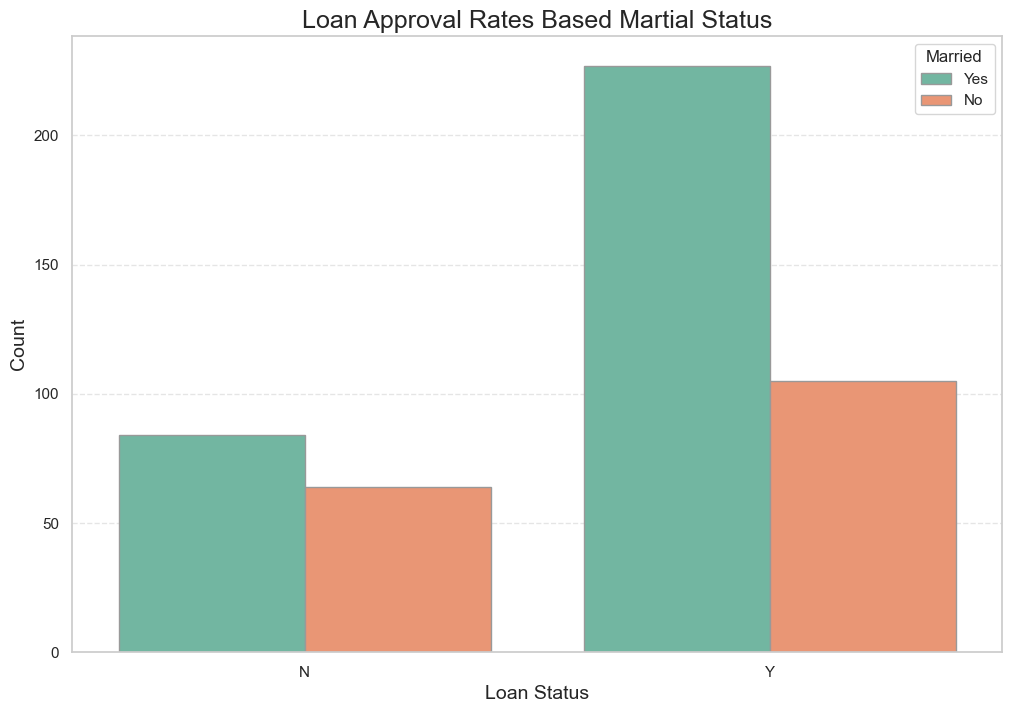

In [20]:
sns.set_theme(style="whitegrid")
plt.figure(figsize=(12, 8))
sns.countplot(x='Loan_Status', hue='Married', data=df, palette="Set2", edgecolor=".6")
plt.title('Loan Approval Rates Based Martial Status', fontsize=18)
plt.xlabel('Loan Status', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.show()

## Approval Rate Based on Gender

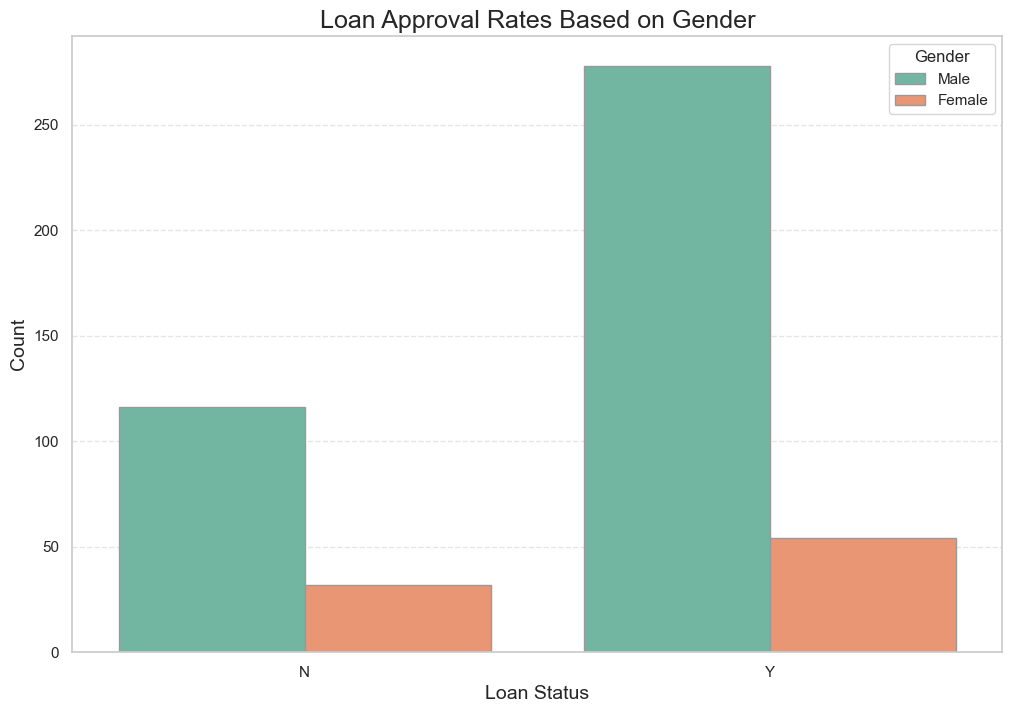

In [21]:
sns.set_theme(style="whitegrid")
plt.figure(figsize=(12, 8))
sns.countplot(x='Loan_Status', hue='Gender', data=df, palette="Set2", edgecolor=".6")
plt.title('Loan Approval Rates Based on Gender', fontsize=18)
plt.xlabel('Loan Status', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.show()

## Approval Based on Education

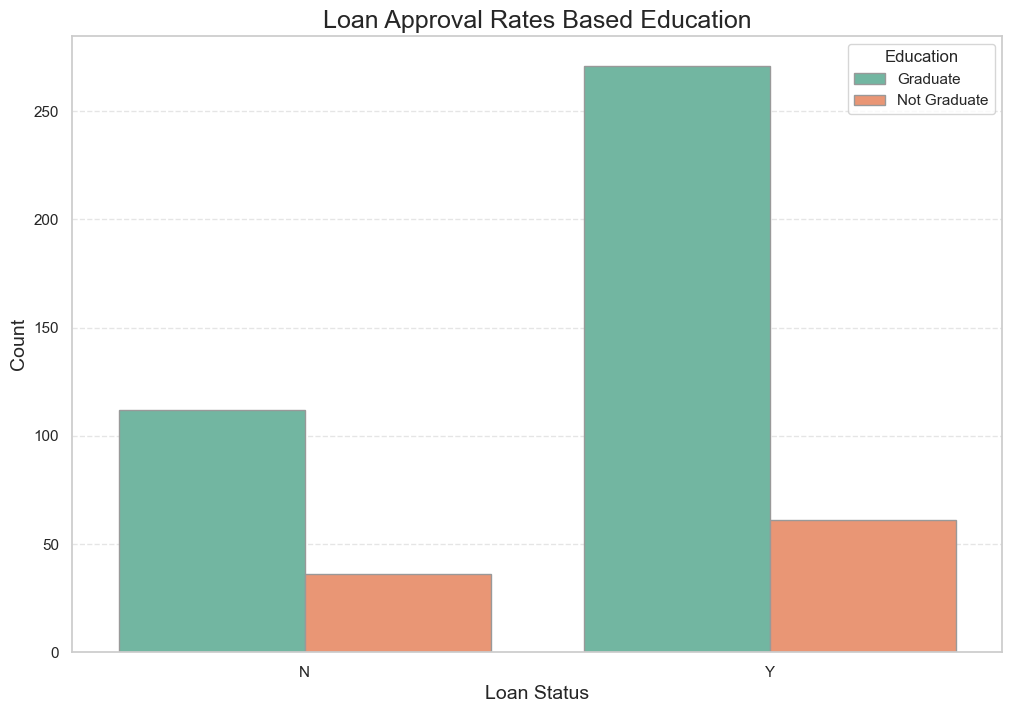

In [22]:
sns.set_theme(style="whitegrid")
plt.figure(figsize=(12, 8))
sns.countplot(x='Loan_Status', hue='Education', data=df, palette="Set2", edgecolor=".6")
plt.title('Loan Approval Rates Based Education', fontsize=18)
plt.xlabel('Loan Status', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.show()

## Approval Rate Based on Property Area

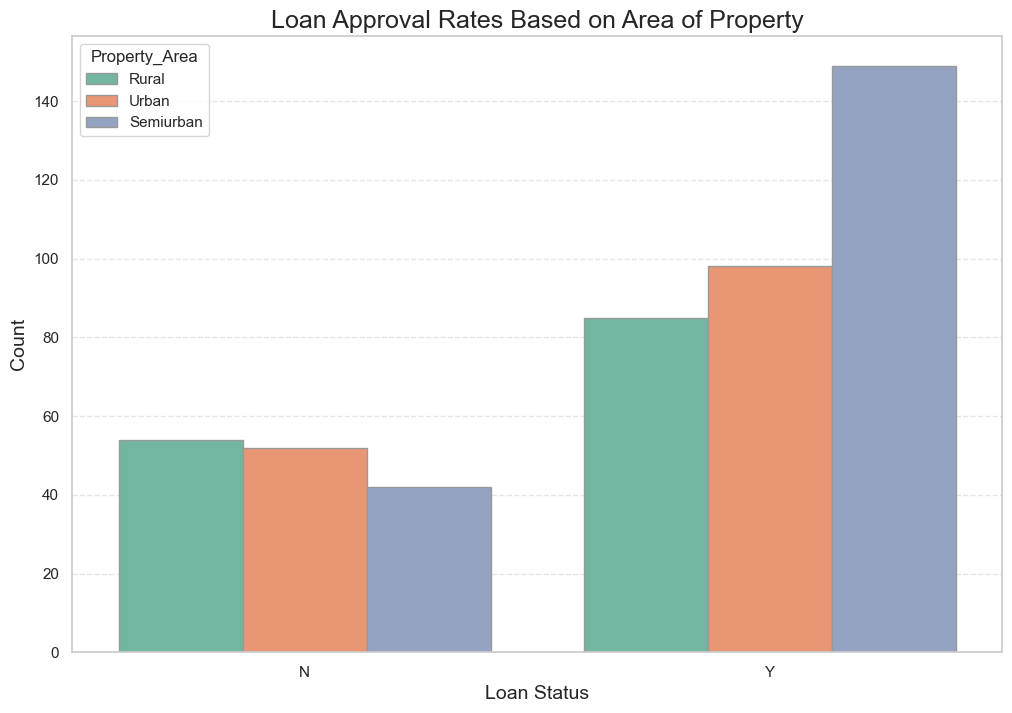

In [23]:
sns.set_theme(style="whitegrid")
plt.figure(figsize=(12, 8))
sns.countplot(x='Loan_Status', hue='Property_Area', data=df, palette="Set2", edgecolor=".6")
plt.title('Loan Approval Rates Based on Area of Property', fontsize=18)
plt.xlabel('Loan Status', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.show()

## Approval Rate based on loan Amount

In [24]:
df['LoanAmount'].value_counts()

LoanAmount
120.0    13
100.0    13
110.0    13
187.0    12
128.0     9
         ..
280.0     1
240.0     1
214.0     1
59.0      1
253.0     1
Name: count, Length: 186, dtype: int64

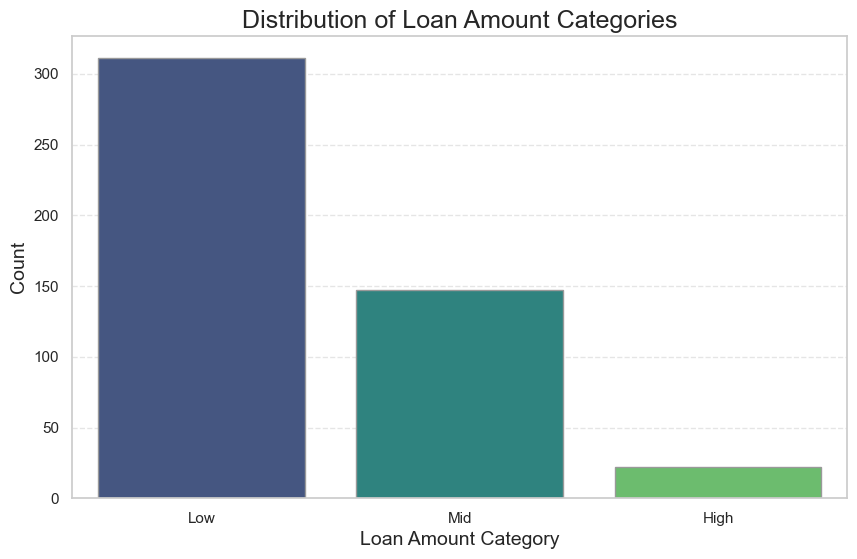

In [25]:
df['LoanAmount_Category'] = pd.cut(df['LoanAmount'], bins=[0, 150, 300, float('inf')], labels=['Low', 'Mid', 'High'], right=False)
sns.set_theme(style="whitegrid")
plt.figure(figsize=(10, 6))
sns.countplot(x='LoanAmount_Category', data=df, palette="viridis", edgecolor=".6", order=['Low', 'Mid', 'High'])
plt.title('Distribution of Loan Amount Categories', fontsize=18)
plt.xlabel('Loan Amount Category', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.show()

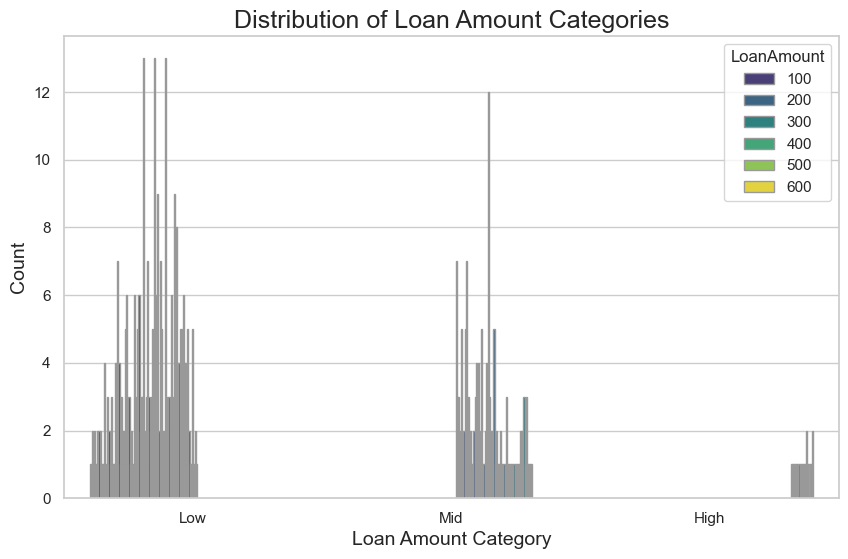

In [26]:
sns.set_theme(style="whitegrid")
plt.figure(figsize=(10, 6))
sns.countplot(x='LoanAmount_Category', data=df,hue='LoanAmount', palette="viridis", edgecolor=".6", order=['Low', 'Mid', 'High'])
plt.title('Distribution of Loan Amount Categories', fontsize=18)
plt.xlabel('Loan Amount Category', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.show()

## Loan Approval Based On Loan Amount

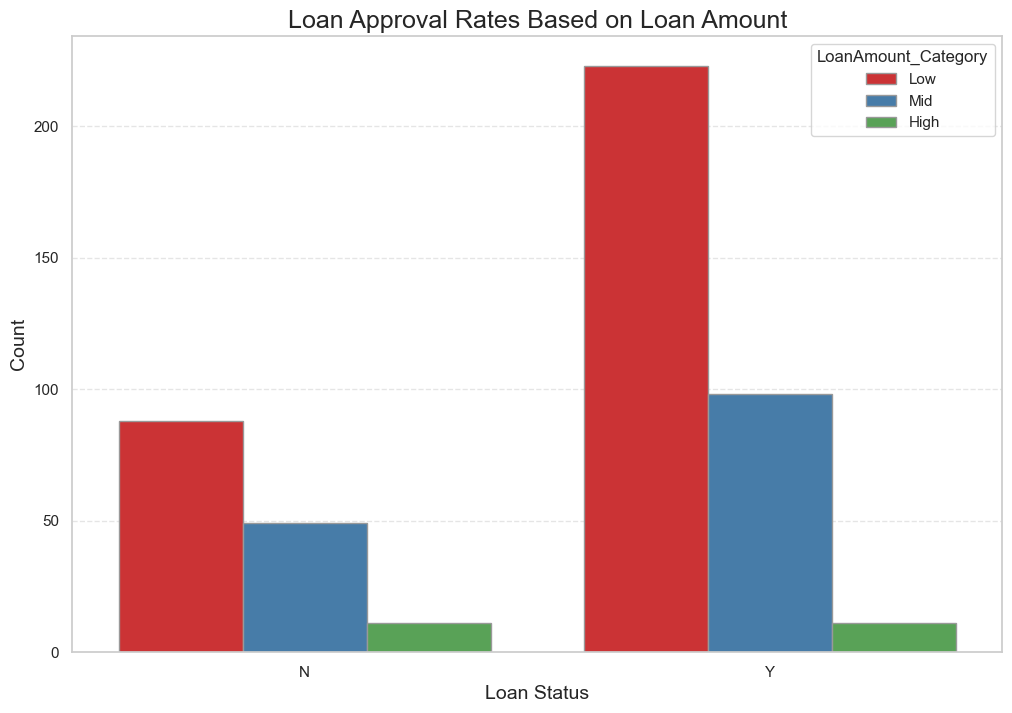

In [27]:
sns.set_theme(style="whitegrid")
plt.figure(figsize=(12, 8))
sns.countplot(x='Loan_Status', hue='LoanAmount_Category', data=df, palette="Set1", edgecolor=".6")
plt.title('Loan Approval Rates Based on Loan Amount', fontsize=18)
plt.xlabel('Loan Status', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.show()

## Approval Rate Based on Self_Employment

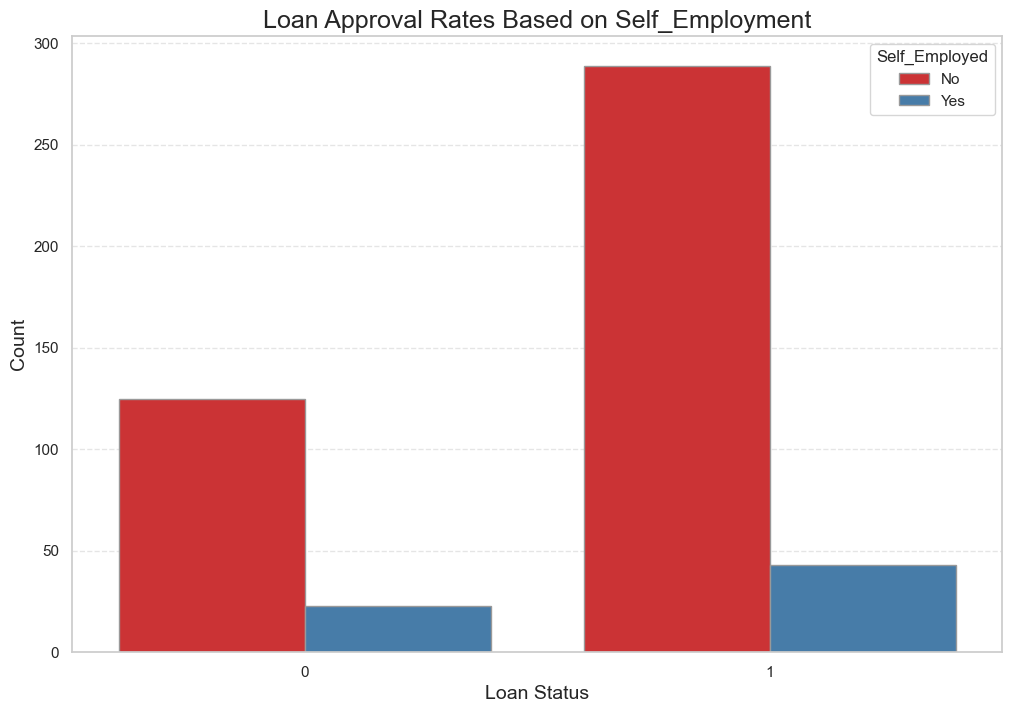

In [75]:
sns.set_theme(style='whitegrid')
plt.figure(figsize=(12,8))
sns.countplot(x='Loan_Status',hue='Self_Employed',data=df,palette='Set1',edgecolor='.6')
plt.title("Loan Approval Rates Based on Self_Employment",fontsize=18)
plt.xlabel('Loan Status',fontsize=14)
plt.ylabel('Count',fontsize=14)
plt.grid(axis='y', linestyle='--',alpha=0.5)
plt.show()

## Scatter Plot of Income vs loan Amount

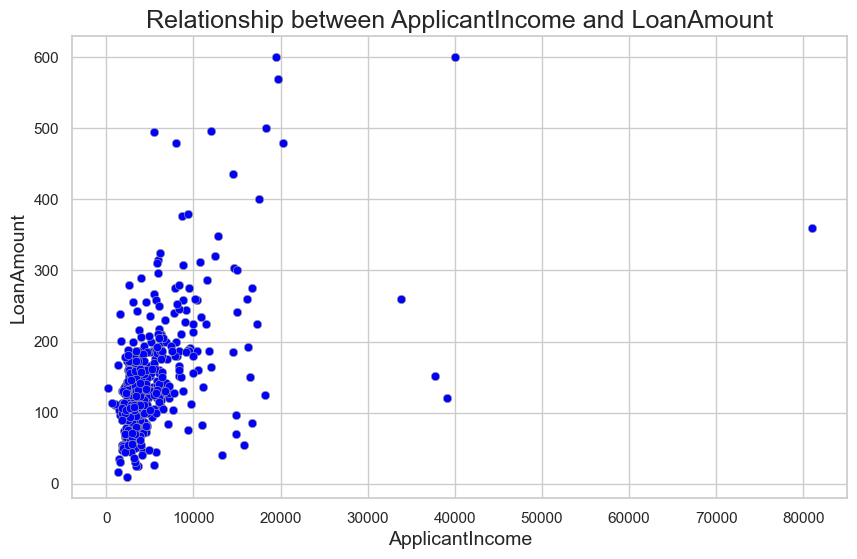

In [28]:
sns.set_theme(style="whitegrid")
plt.figure(figsize=(10, 6))
sns.scatterplot(x='ApplicantIncome', y='LoanAmount', data=df, color='blue', edgecolor=".6")
plt.title('Relationship between ApplicantIncome and LoanAmount', fontsize=18)
plt.xlabel('ApplicantIncome', fontsize=14)
plt.ylabel('LoanAmount', fontsize=14)
plt.show()

## Loan Amount Based on Gender

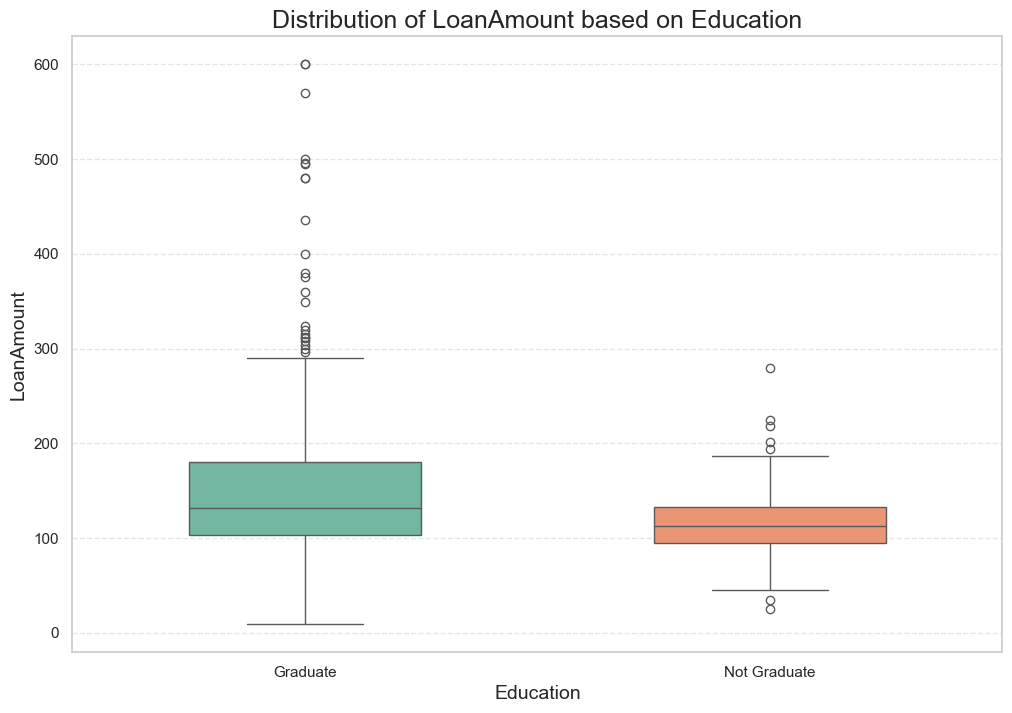

In [29]:
sns.set_theme(style="whitegrid")
plt.figure(figsize=(12, 8))
sns.boxplot(x='Education', y='LoanAmount', data=df, palette="Set2", width=0.5)
plt.title('Distribution of LoanAmount based on Education', fontsize=18)
plt.xlabel('Education', fontsize=14)
plt.ylabel('LoanAmount', fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.show()

## Loan Amount vs Property Area

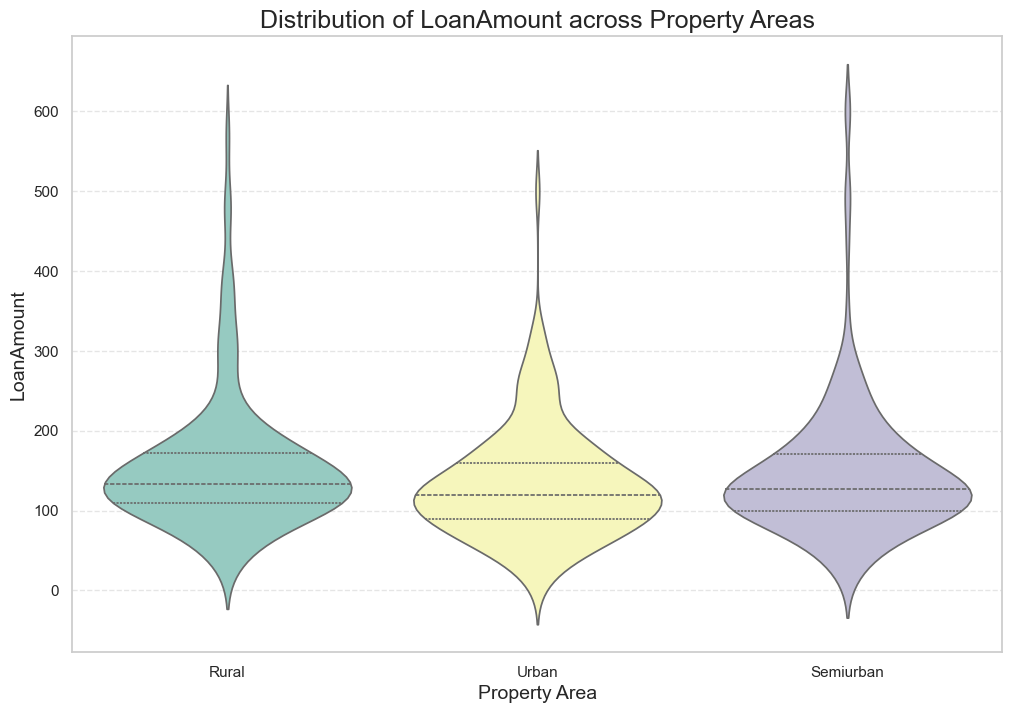

In [30]:
sns.set_theme(style="whitegrid")
plt.figure(figsize=(12, 8))
sns.violinplot(x='Property_Area', y='LoanAmount', data=df, palette="Set3", inner="quartile")
plt.title('Distribution of LoanAmount across Property Areas', fontsize=18)
plt.xlabel('Property Area', fontsize=14)
plt.ylabel('LoanAmount', fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.show()

## Applicant vs Co-Applicant income

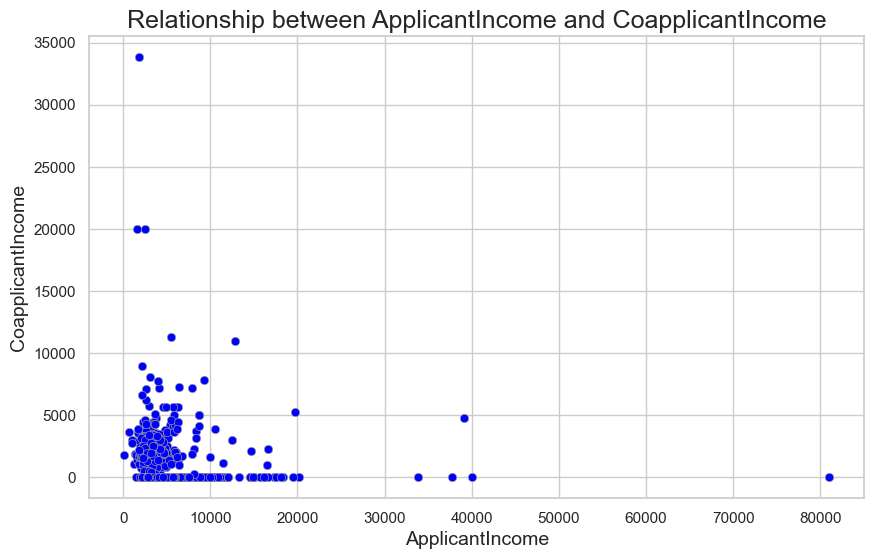

In [31]:
sns.set_theme(style="whitegrid")
plt.figure(figsize=(10, 6))
sns.scatterplot(x='ApplicantIncome', y='CoapplicantIncome', data=df, color='blue', edgecolor=".6")
plt.title('Relationship between ApplicantIncome and CoapplicantIncome', fontsize=18)
plt.xlabel('ApplicantIncome', fontsize=14)
plt.ylabel('CoapplicantIncome', fontsize=14)
plt.show()

## Loan Amount vs loan term

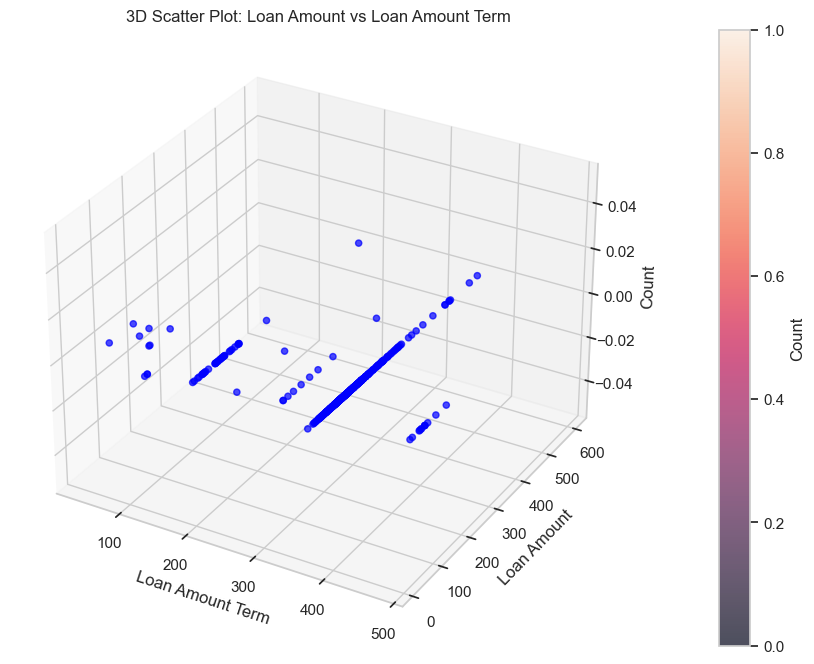

In [70]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(df['Loan_Amount_Term'], df['LoanAmount'], c='blue', marker='o', alpha=0.7)
ax.set_xlabel('Loan Amount Term')
ax.set_ylabel('Loan Amount')
ax.set_zlabel('Count')
ax.set_title('3D Scatter Plot: Loan Amount vs Loan Amount Term')
colorbar = plt.colorbar(scatter, ax=ax, orientation='vertical', pad=0.1)
colorbar.set_label('Count')
plt.show()

## Dependents vs loan amount and loan amount term

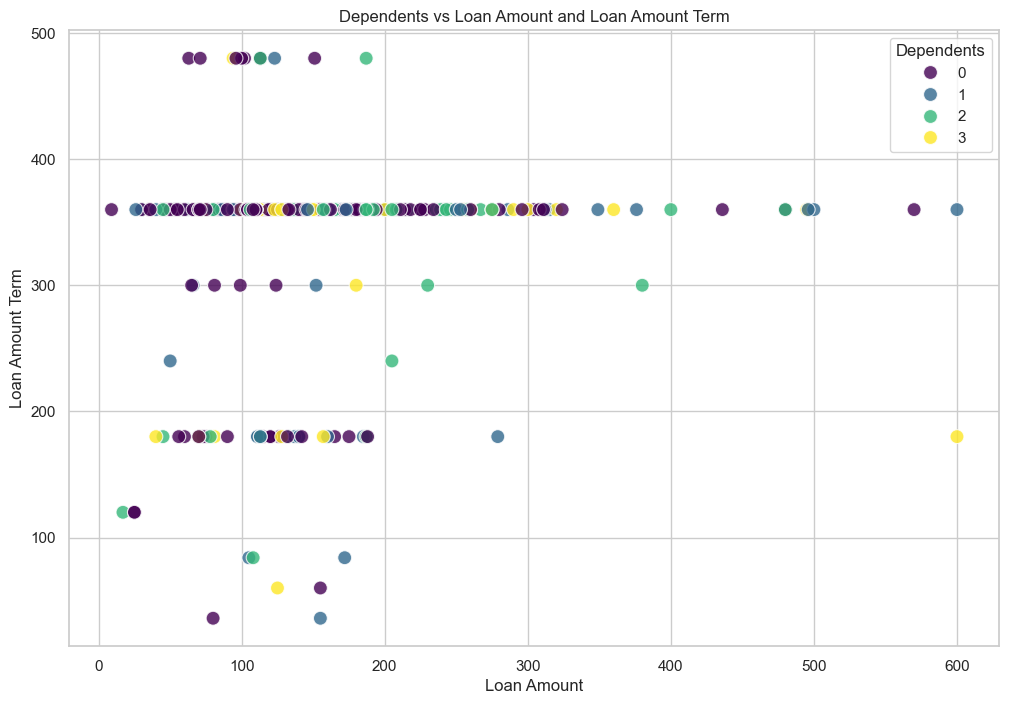

In [71]:
plt.figure(figsize=(12, 8))
sns.scatterplot(x='LoanAmount', y='Loan_Amount_Term', hue='Dependents', data=df, palette='viridis', s=100, alpha=0.8)
plt.xlabel('Loan Amount')
plt.ylabel('Loan Amount Term')
plt.title('Dependents vs Loan Amount and Loan Amount Term')
plt.show()

## Self Employment vs Income

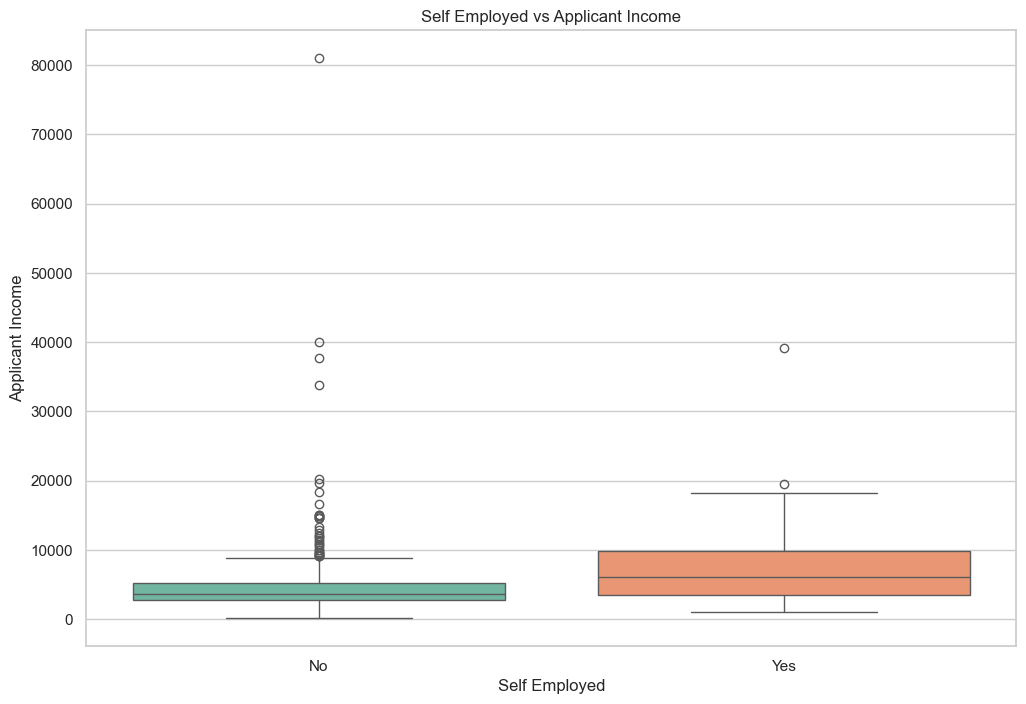

In [72]:
plt.figure(figsize=(12, 8))
sns.boxplot(x='Self_Employed', y='ApplicantIncome', data=df, palette='Set2')
plt.xlabel('Self Employed')
plt.ylabel('Applicant Income')
plt.title('Self Employed vs Applicant Income')
plt.show()

## Self Employed 'Males' income vs Self Employed 'Females' income

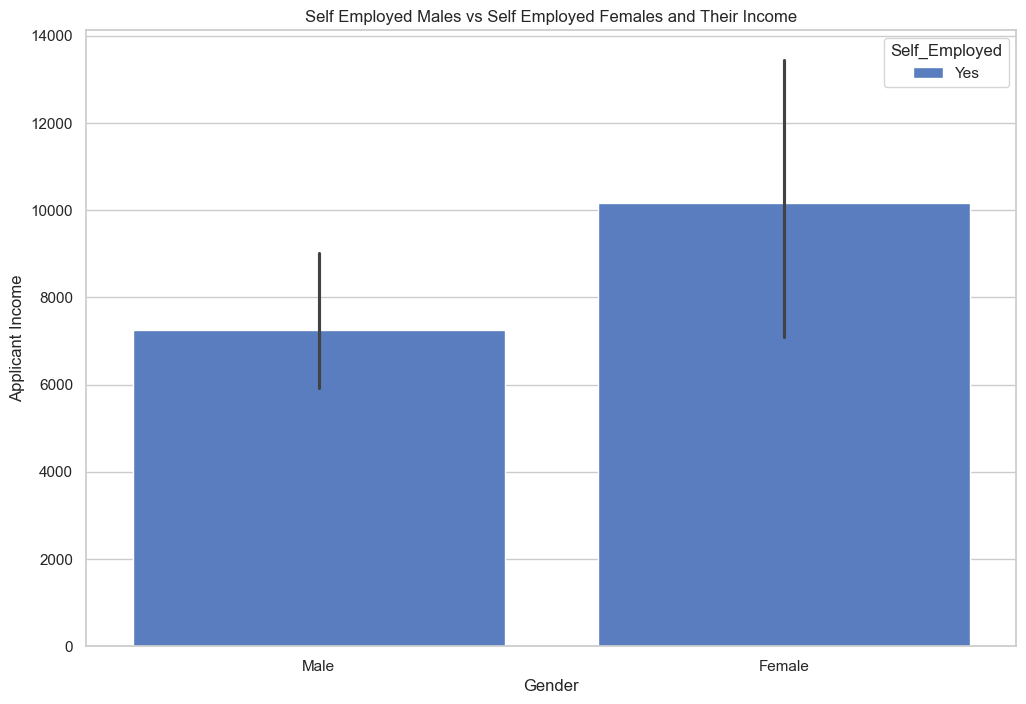

In [73]:
self_employed_df = df[df['Self_Employed'] == 'Yes']
plt.figure(figsize=(12, 8))
sns.barplot(x='Gender', y='ApplicantIncome', hue='Self_Employed', data=self_employed_df, palette='muted')
plt.xlabel('Gender')
plt.ylabel('Applicant Income')
plt.title('Self Employed Males vs Self Employed Females and Their Income')
plt.show()

## Pairplot

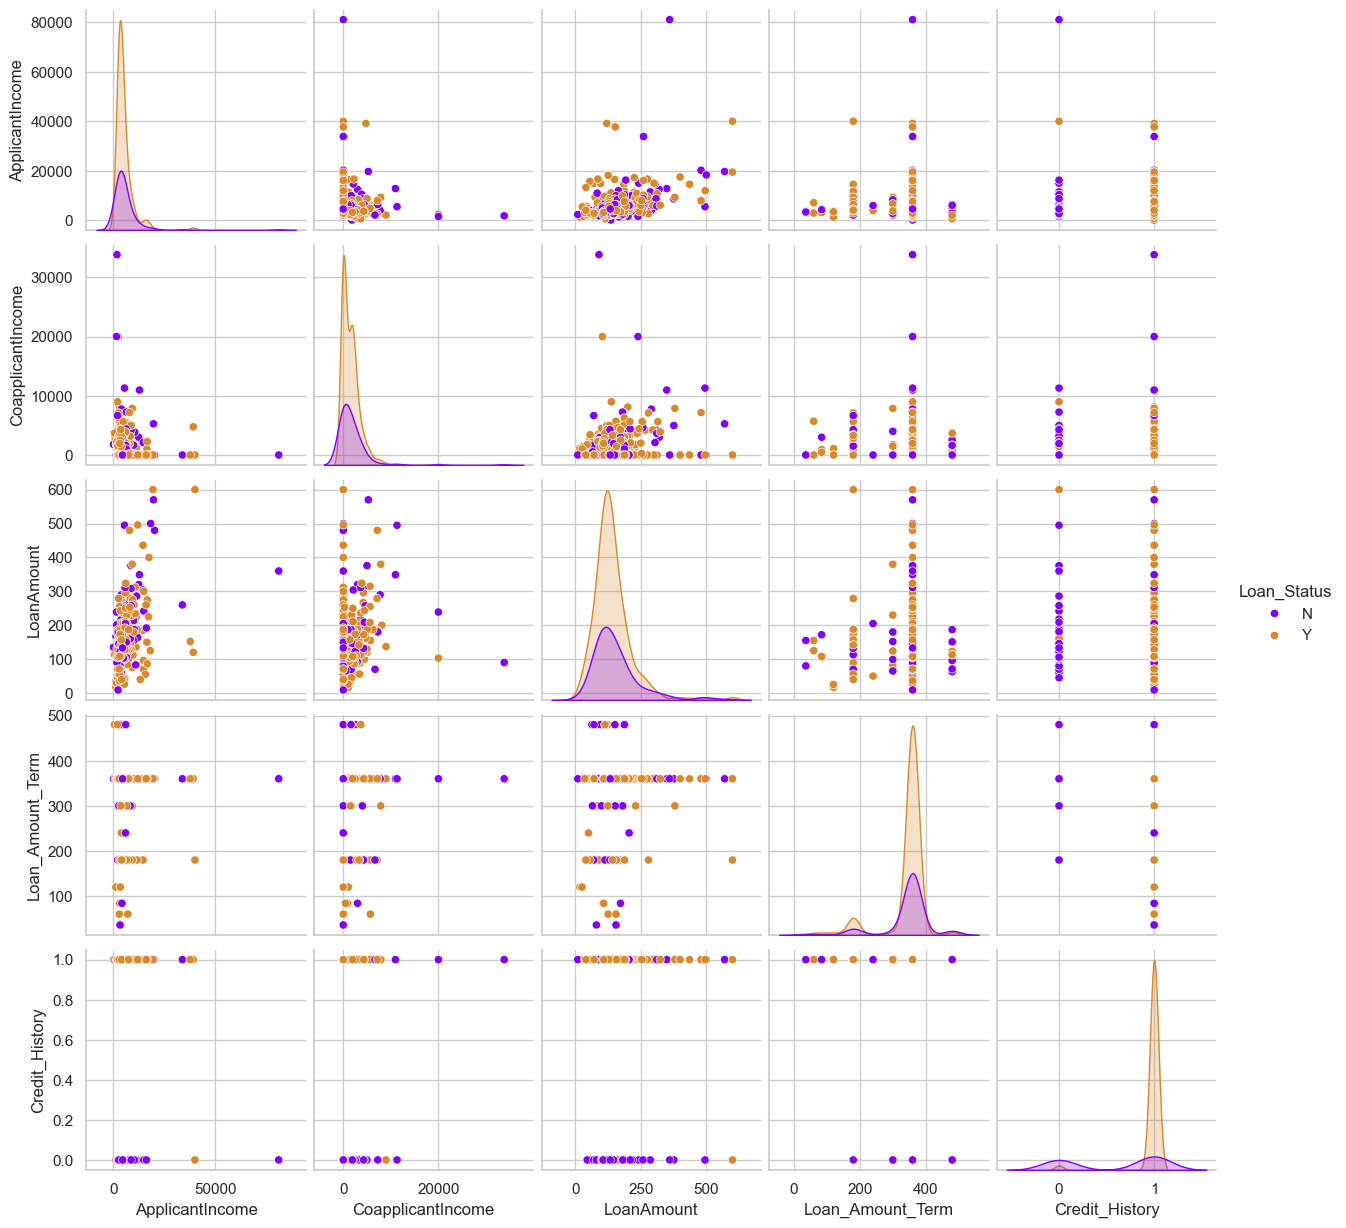

In [32]:
sns.pairplot(df,hue='Loan_Status',palette = ["#8000ff","#da8829"])
plt.show()

## Correlation Matrix

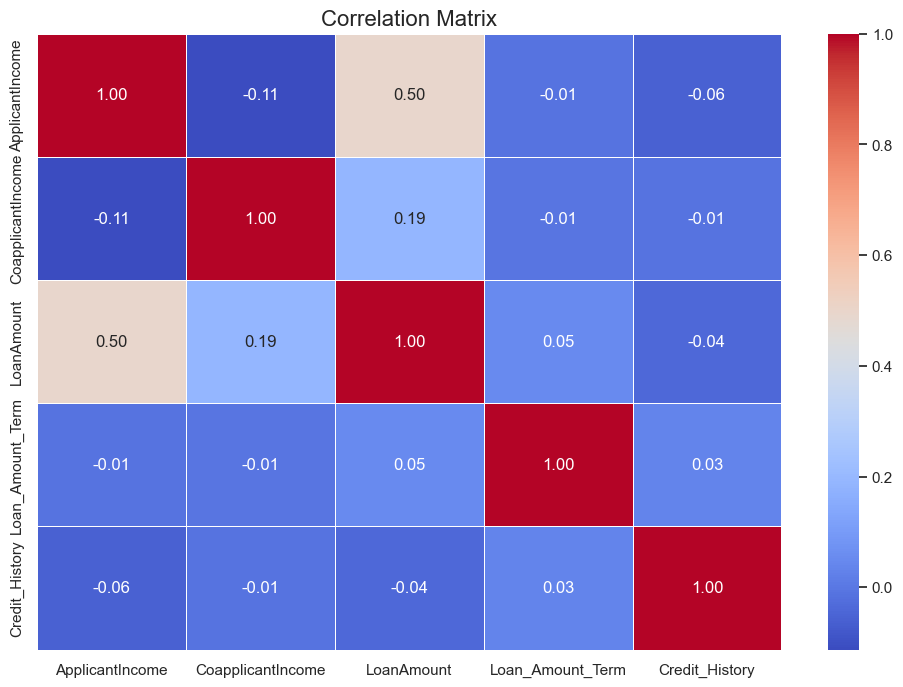

In [33]:
numeric_df = df.select_dtypes(include='number')
correlation_matrix = numeric_df.corr()

plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix', fontsize=16)
plt.show()

## Feature Engineering

In [34]:
df['Loan_Status'].replace('Y',1,inplace=True)
df['Loan_Status'].replace('N',0,inplace=True)

In [35]:
df['Dependents'].replace('3+',3,inplace=True)

In [36]:
df.drop('Loan_ID',axis=1,inplace=True)

## Data Preprocessing

In [37]:
df['LoanAmount_Category'].value_counts()

LoanAmount_Category
Low     311
Mid     147
High     22
Name: count, dtype: int64

In [38]:
num_cols=['ApplicantIncome','CoapplicantIncome','LoanAmount','Loan_Amount_Term','Credit_History','Dependents']
categ_cols=['Gender','Married','Education','Self_Employed','LoanAmount_Category']

In [39]:
df['ApplicantIncome']=df['ApplicantIncome'].astype('float64')

In [40]:
df['LoanAmount_Category']=df['LoanAmount_Category'].astype('object')

In [41]:
df['Dependents']=df['Dependents'].astype('int64')

## Splitting The Dataset

In [42]:
## to features and target
X = df.drop(columns=['Loan_Status'], axis=1)
y = df['Loan_Status']


## split to train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True, random_state=45, stratify=y)

print('X_train.shape \t', X_train.shape)
print('y_train.shape \t', y_train.shape)
print('**'*20)
print('X_test.shape \t', X_test.shape)
print('y_test.shape \t', y_test.shape)

X_train.shape 	 (384, 12)
y_train.shape 	 (384,)
****************************************
X_test.shape 	 (96, 12)
y_test.shape 	 (96,)


## Pipeline

In [44]:
num_pipline = Pipeline(steps=[
                ('selector', DataFrameSelector(num_cols)),
                ('imputer', SimpleImputer(strategy='median')),
                ('scaler', StandardScaler())
            ])

## Categorical

categ_pipeline = Pipeline(steps=[
    ('selector', DataFrameSelector(categ_cols)),
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('encoder', OneHotEncoder(drop='first', sparse_output=False))
])


all_pipeline = FeatureUnion(transformer_list=[
                        ('num', num_pipline),
                        ('categ', categ_pipeline)
                    ])

## apply
X_train_final  = all_pipeline.fit_transform(X_train)
X_test_final = all_pipeline.transform(X_test)

In [45]:
print('X_train_final.shape \t', X_train_final.shape)
print('y_train.shape \t', y_train.shape)
print('**'*20)
print('X_test_final.shape \t', X_test_final.shape)
print('y_test.shape \t', y_test.shape)  ## fine

X_train_final.shape 	 (384, 12)
y_train.shape 	 (384,)
****************************************
X_test_final.shape 	 (96, 12)
y_test.shape 	 (96,)


## Modeling

## -SVC

In [46]:
svc_clf =SVC(kernel='linear', random_state=45,probability=True)
svc_clf.fit(X_train_final, y_train)

## Predict and evaluate 
y_pred_train_svc= svc_clf.predict(X_train_final)
y_pred_test_svc= svc_clf.predict(X_test_final)

## Evaluate
score_train_svc = f1_score(y_train, y_pred_train_svc)
score_test_svc  = f1_score(y_test, y_pred_test_svc)

print(f'Score for Training Dataset using SVC {score_train_svc * 100 :.3f}')
print(f'Score for Testing Dataset using SVC {score_test_svc * 100 :.3f}')

Score for Training Dataset using SVC 88.325
Score for Testing Dataset using SVC 84.768


In [47]:
report = classification_report(y_test, y_pred_test_svc)
print('Classification Report:')
print(report)

Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.30      0.44        30
           1       0.75      0.97      0.85        66

    accuracy                           0.76        96
   macro avg       0.79      0.63      0.64        96
weighted avg       0.77      0.76      0.72        96



## Tuning it a bit

In [48]:
param_grid = {
    'C': np.arange(1,10,1),  
    'gamma': [0.001, 0.01, 0.1, 1] 
}
svc=SVC()
grid_search = GridSearchCV(estimator=svc, param_grid=param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train_final, y_train)
print("The best params are :", grid_search.best_params_)
print("The best score is   :", grid_search.best_score_)


# predicting the values
y_pred =grid_search.predict(X_test_final)
y_pred_train=grid_search.predict(X_train_final)
# printing the test accuracy
print("The test accuracy score of SVM after hyper-parameter tuning is ", accuracy_score(y_test, y_pred))

The best params are : {'C': 4, 'gamma': 0.1}
The best score is   : 0.8229323308270675
The test accuracy score of SVM after hyper-parameter tuning is  0.7291666666666666


In [49]:
report2 = classification_report(y_test, y_pred)
print('Classification Report:')
print(report2)

Classification Report:
              precision    recall  f1-score   support

           0       0.64      0.30      0.41        30
           1       0.74      0.92      0.82        66

    accuracy                           0.73        96
   macro avg       0.69      0.61      0.62        96
weighted avg       0.71      0.73      0.69        96



## RFC

In [50]:
forst_clf = RandomForestClassifier(n_estimators=150, max_depth=10, random_state=45)
forst_clf.fit(X_train_final, y_train)

## Predict and evaluate 
y_pred_train_forest = forst_clf.predict(X_train_final)
y_pred_test_forest = forst_clf.predict(X_test_final)

## Evaluate
score_train_forest = f1_score(y_train, y_pred_train_forest)
score_test_forest = f1_score(y_test, y_pred_test_forest)

print(f'Score for Training Dataset using RF without solve imbalancing {score_train_forest * 100 :.3f}')
print(f'Score for Testing Dataset using RF without solve imbalancing {score_test_forest * 100 :.3f}')

Score for Training Dataset using RF without solve imbalancing 95.000
Score for Testing Dataset using RF without solve imbalancing 82.432


In [51]:
report3 = classification_report(y_test, y_pred_test_forest)
print('Classification Report:')
print(report3)

Classification Report:
              precision    recall  f1-score   support

           0       0.64      0.30      0.41        30
           1       0.74      0.92      0.82        66

    accuracy                           0.73        96
   macro avg       0.69      0.61      0.62        96
weighted avg       0.71      0.73      0.69        96



In [52]:

# Define the Random Forest model
rf_model = RandomForestClassifier(random_state=45)

# Define hyperparameters to tune
param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

# Use GridSearchCV to find the best hyperparameters
grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, scoring=f1_score, cv=3)
grid_search_result = grid_search.fit(X_train_final, y_train)

# Print the best parameters and corresponding F1 score
print("Best Parameters: ", grid_search_result.best_params_)

# Use the best model from the grid search
best_rf_model = grid_search_result.best_estimator_

# Evaluate the best model on the test set
y_pred_test_best = best_rf_model.predict(X_test_final)
score_test_best = f1_score(y_test, y_pred_test_best)

print(f'F1 Score for Testing Dataset using Best RF Model: {score_test_best * 100:.3f}')


Best Parameters:  {'bootstrap': True, 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 50}
F1 Score for Testing Dataset using Best RF Model: 83.221


## Decision Tree Classifier

In [53]:
DT_clf = DecisionTreeClassifier(
    max_depth=5,
    min_samples_split=2,
    min_samples_leaf=1,
    max_features=None,
    criterion='gini',
    random_state=45,
)
DT_clf.fit(X_train_final, y_train)

## Predict and evaluate 
y_pred_train_DT = DT_clf.predict(X_train_final)
y_pred_test_DT = DT_clf.predict(X_test_final)

## Evaluate
score_train_DT = f1_score(y_train, y_pred_train_DT)
score_test_DT = f1_score(y_test, y_pred_test_DT)

print(f'Score for Training Dataset using DT without solve imbalancing {score_train_DT * 100 :.3f}')
print(f'Score for Testing Dataset using DT without solve imbalancing {score_test_DT * 100 :.3f}')

Score for Training Dataset using DT without solve imbalancing 90.657
Score for Testing Dataset using DT without solve imbalancing 80.822


In [54]:
report4= classification_report(y_test, y_pred_test_DT)
print('Classification Report:')
print(report4)

Classification Report:
              precision    recall  f1-score   support

           0       0.56      0.30      0.39        30
           1       0.74      0.89      0.81        66

    accuracy                           0.71        96
   macro avg       0.65      0.60      0.60        96
weighted avg       0.68      0.71      0.68        96



In [55]:

# Define the Decision Tree model
dt_model = DecisionTreeClassifier(random_state=45)

param_grid = {
    'max_depth': [None, 5, 10, 15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': [None, 'sqrt', 'log2'],
    'criterion': ['gini', 'entropy']
}

# Use GridSearchCV to find the best hyperparameters
grid_search = GridSearchCV(estimator=dt_model, param_grid=param_grid, scoring=f1_score, cv=3)
grid_search_result = grid_search.fit(X_train_final, y_train)

# Print the best parameters and corresponding F1 score
print("Best Parameters: ", grid_search_result.best_params_)
print("Best F1 Score: {:.3f}".format(grid_search_result.best_score_))

# Use the best model from the grid search
best_dt_model = grid_search_result.best_estimator_

# Evaluate the best model on the test set
y_pred_test_best_dt = best_dt_model.predict(X_test_final)
score_test_best_dt = f1_score(y_test, y_pred_test_best_dt)

print(f'F1 Score for Testing Dataset using Best Decision Tree Model: {score_test_best_dt * 100:.3f}')


Best Parameters:  {'criterion': 'gini', 'max_depth': None, 'max_features': None, 'min_samples_leaf': 1, 'min_samples_split': 2}
Best F1 Score: nan
F1 Score for Testing Dataset using Best Decision Tree Model: 73.600


## KNN Classifier

In [56]:
knn_clf = KNeighborsClassifier(n_neighbors=5, p=2,weights='distance')
knn_clf.fit(X_train_final, y_train)

y_pred_train_knn = knn_clf.predict(X_train_final)
y_pred_test_knn = knn_clf.predict(X_test_final)

score_train_knn = f1_score(y_train, y_pred_train_knn)
score_test_knn = f1_score(y_test, y_pred_test_knn)

print(f'Score for Training Dataset using KNN after SMOTE {score_train_knn * 100 :.3f}')
print(f'Score for Testing Dataset using KNN after SMOTE {score_test_knn * 100 :.3f}')

Score for Training Dataset using KNN after SMOTE 100.000
Score for Testing Dataset using KNN after SMOTE 82.432


In [57]:
report5= classification_report(y_test, y_pred_test_knn)
print('Classification Report:')
print(report5)

Classification Report:
              precision    recall  f1-score   support

           0       0.64      0.30      0.41        30
           1       0.74      0.92      0.82        66

    accuracy                           0.73        96
   macro avg       0.69      0.61      0.62        96
weighted avg       0.71      0.73      0.69        96



## I'm picking the random forest classifier

## Confusion Matrix

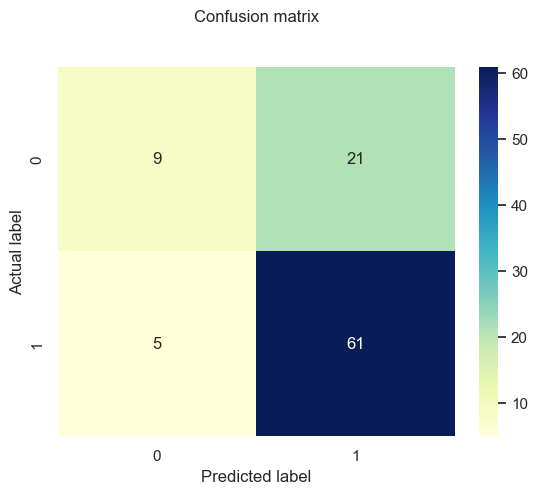

In [58]:
cnf_matrix =confusion_matrix(y_test, y_pred_test_forest)
p = sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.show()

## ROC Curve

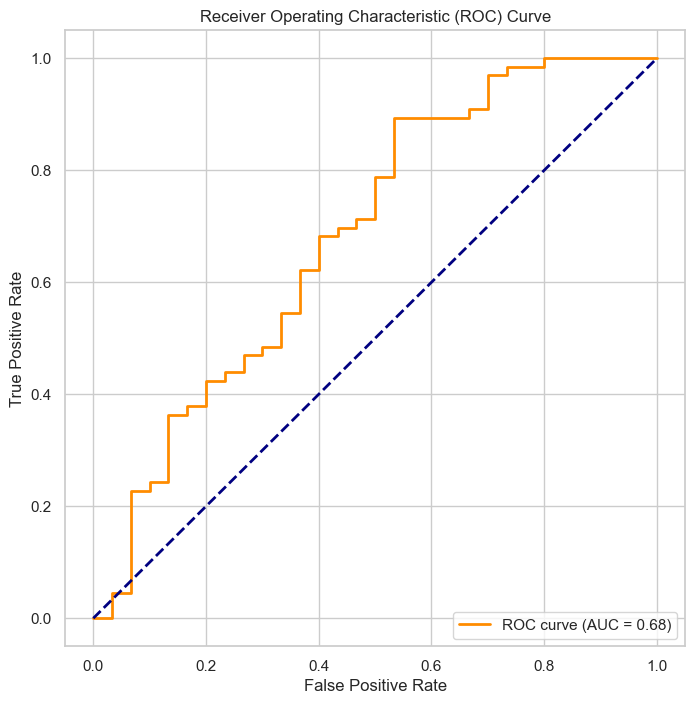

In [59]:
# Get predicted probabilities for the positive class
from sklearn.metrics import roc_curve,auc

y_prob_test_rf = forst_clf.predict_proba(X_test_final)[:, 1]

# Compute ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, y_prob_test_rf)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 8))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (AUC = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

## Dumping the model

In [60]:
joblib.dump(forst_clf, 'forst_model.pkl') 


['forst_model.pkl']